# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [81]:
import pandas as pd
import numpy as np

more_monsters = pd.read_csv("aidedd_blocks2.csv")

<h1 style="background-color:SlateBlue;text-align:center">Missing Data</h1>

*Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.*

**Findings:**

59 Attributes and 3 actions are missing.  Dropped these values and looked through the data again.  Seems to be A-OK.

Few observations on these "unavailable" reports.  1. Many of them have a lot of variety in their creation, similar to an actual player character.  This would make it hard to document each instance.  2.  The website that this data came from is using the D&D materials with permissions.  These creatures might not have been given permissions at the time this dataset was made.  3.  This could be outdated since the time of dataset creation and this notebook.  
    
I want to be able to create creatures/NPCs right away, so I am dropping creatures that would require me to do more research at this time.

<h1 style="background-color:SlateBlue;text-align:center">Irregular Data</h1>

*Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.*

[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

[Pandas: Select Rows Where Value Appears in Any Column](https://www.statology.org/pandas-find-value-any-column/)

[Select rows that contain specific text using Pandas](https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/)

Most trends follow either size or power with a positive correlation.  There are occasional outliers, but when looking at the selected stat, the monster and its existence, along with its other stats, it still reads as an intentional data point.  

I examined a few outliers in each scatter plot. All seem to fit the creature in this setting.  Tiamet is an all-powerful dragon, often a final boss for many parties.  She has 5 heads of different colors, and as a dragon that means that pretty much each head has attributes from that color. Also being legendary, gargantuan, and 5 headed- I am not surprised that she is the most common outlier.

<h1 style="background-color:SlateBlue;text-align:center">Unnecessary Data</h1>

*Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.*

Currently, I am more interested in the stats of each monster rather than the attributes or actions.  However, both attributes and actions are important when holistically looking at a monster.  My purpose for this exploration is to better understand monsters for my players and that includes not only how fast they can swim, but how their swimming works.

<h1 style="background-color:SlateBlue;text-align:center">Inconsistent Data</h1>

*Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.*

I found inconsistancies with the legendary and legendary_actions columns.  8 legendary creatures have no available legendary_actions.  This is from the data source.  The choice of langage implies there are actions available, but not part of the initial dataset.  I am not going to worry about these for the depth of this project.  

## Summarize Your Results

*Make note of your answers to the following questions.*

1. *Did you find all four types of dirty data in your dataset?*
2. *Did the process of cleaning your data give you new insights into your dataset?*
3. *Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?*

1. Yes, all 4 were present
1. Yes, if I want to murder my party use Tiamet because she's practically invincible.
1. I want to explore more relationships about why creatures have their cr in terms of stats.  Is the CR high because its fast, can fly, and has truesight?  Or is it because its ginormous and has 5 heads?

## More Monsters Table Notes

In the cells below, I cleaned and explored the data

In [82]:
more_monsters.shape

(762, 53)

In [83]:
more_monsters.columns

Index(['name', 'size', 'type', 'alignment', 'languages', 'ac', 'hp', 'cr',
       'speed', 'swim', 'fly', 'climb', 'burrow', 'passive_perception',
       'darkvision', 'truesight', 'tremorsense', 'blindsight', 'strength',
       'str_mod', 'dex', 'dex_mod', 'con', 'con_mod', 'intel', 'int_mod',
       'wis', 'wis_mod', 'cha', 'cha_mod', 'str_save', 'dex_save', 'con_save',
       'int_save', 'wis_save', 'cha_save', 'history', 'perception', 'stealth',
       'persuasion', 'insight', 'deception', 'arcana', 'religion',
       'acrobatics', 'athletics', 'intimidation', 'senses', 'attributes',
       'actions', 'legendary_actions', 'legendary', 'source'],
      dtype='object')

In [84]:
more_monsters.describe()
# my numeric values

,ac,hp,cr,speed,swim,fly,climb,burrow,passive_perception,darkvision,...,stealth,persuasion,insight,deception,arcana,religion,acrobatics,athletics,intimidation,legendary
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,14.595801,88.194226,5.546424,29.803150,4.960630,13.661417,2.952756,0.984252,13.023622,47.755906,...,1.639108,0.385827,0.520997,0.577428,0.750656,0.305774,0.144357,0.400262,0.392388,0.056430
std,3.095821,94.779066,6.252214,12.334075,14.447732,27.694709,9.217499,5.322924,3.908879,46.165198,...,2.703906,1.861346,2.026164,2.134730,2.625215,1.518936,0.983518,1.738079,1.898777,0.230903
min,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,22.000000,0.500000,30.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,58.000000,3.000000,30.000000,0.000000,0.000000,0.000000,0.000000,12.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,126.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,14.000000,60.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,676.000000,30.000000,120.000000,120.000000,150.000000,40.000000,50.000000,36.000000,240.000000,...,16.000000,16.000000,14.000000,15.000000,22.000000,17.000000,11.000000,14.000000,18.000000,1.000000


In [85]:
more_monsters.info()
# data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                762 non-null    object 
 1   size                762 non-null    object 
 2   type                762 non-null    object 
 3   alignment           762 non-null    object 
 4   languages           762 non-null    object 
 5   ac                  762 non-null    float64
 6   hp                  762 non-null    int64  
 7   cr                  762 non-null    float64
 8   speed               762 non-null    int64  
 9   swim                762 non-null    int64  
 10  fly                 762 non-null    int64  
 11  climb               762 non-null    int64  
 12  burrow              762 non-null    int64  
 13  passive_perception  762 non-null    int64  
 14  darkvision          762 non-null    int64  
 15  truesight           762 non-null    int64  
 16  tremorse

In [158]:
more_monsters.isna().sum()

# Nulls are found in the following columns 
# attributes            59
# actions                3

name                   0
size                   0
type                   0
alignment              0
languages              0
ac                     0
hp                     0
cr                     0
speed                  0
swim                   0
fly                    0
climb                  0
burrow                 0
passive_perception     0
darkvision             0
truesight              0
tremorsense            0
blindsight             0
strength               0
str_mod                0
dex                    0
dex_mod                0
con                    0
con_mod                0
intel                  0
int_mod                0
wis                    0
wis_mod                0
cha                    0
cha_mod                0
str_save               0
dex_save               0
con_save               0
int_save               0
wis_save               0
cha_save               0
history                0
perception             0
stealth                0
persuasion             0


In [87]:
clean_monsters = more_monsters.dropna(subset=["attributes"])

In [88]:
clean_monsters.shape
# rows with nulls in the attributes have been dropped

(703, 53)

In [89]:
clean_monsters = clean_monsters.dropna(subset=['actions'])

In [90]:
clean_monsters.shape
# rows with nulls in actions have been dropped

(700, 53)

In [159]:
clean_monsters.isna().sum()
# no more nulls

name                  0
size                  0
type                  0
alignment             0
languages             0
ac                    0
hp                    0
cr                    0
speed                 0
swim                  0
fly                   0
climb                 0
burrow                0
passive_perception    0
darkvision            0
truesight             0
tremorsense           0
blindsight            0
strength              0
str_mod               0
dex                   0
dex_mod               0
con                   0
con_mod               0
intel                 0
int_mod               0
wis                   0
wis_mod               0
cha                   0
cha_mod               0
str_save              0
dex_save              0
con_save              0
int_save              0
wis_save              0
cha_save              0
history               0
perception            0
stealth               0
persuasion            0
insight               0
deception       

### Creature Basics

- **name**: Name of creature
- **size**: How large/small a creature is.
    - Tiny, Small, Medium, Large, Huge, Gargantuan
- **type**: The nature of the creature
    - Abberations, Beasts, Celestials, Dragons, Elementals, Fey, Fiends, Giants, Humanoids, Monstrosities, Oozes, Plants, Undead
- **alignment**: Dispositon of the creature
    - Options: Lawful Good, Neutral Good, Chaotic Good, Lawful Neutral, True Neutral, Chaotic Neutral, Lawful Evil, Neutral Evil, Chaotic Evil.
- **languages**: How the creature communicates/understands

<AxesSubplot:ylabel='cr'>

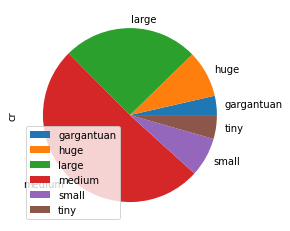

In [92]:
dt = clean_monsters.groupby("size").count()
dt.plot.pie(y="cr")

<AxesSubplot:ylabel='cr'>

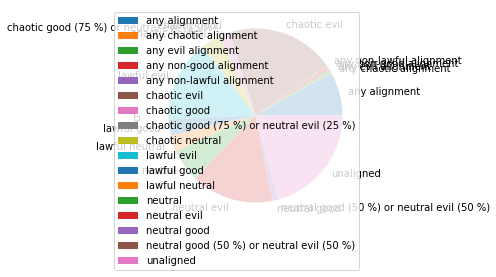

In [93]:
dt = clean_monsters.groupby("alignment").count()
dt.plot.pie(y="cr")

### Creature Difficulty
    
- **ac**: Amount of protection a monster has.  Can be armor, shields, or naturally occuring
    - Ranges from 5-25
- **hp**: Amount of damage a monster can take
    - Ranges from 1-676
- **cr**: Challenge rating or estimated level of difficulty/threat of the creature. This rating matrix sets the amount of experience for players in the party.
    - CR range is 0-30, including 1/8, 1/4, 1/2 CRs

<AxesSubplot:ylabel='Frequency'>

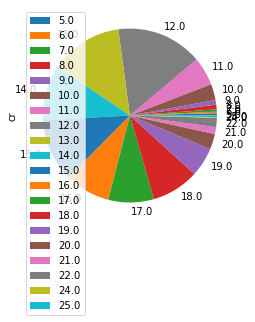

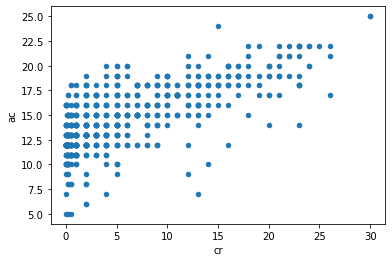

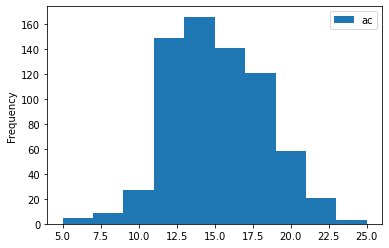

In [94]:
dt = clean_monsters.groupby("ac").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="ac")
clean_monsters.plot.hist(x="cr", y="ac")

<AxesSubplot:ylabel='Frequency'>

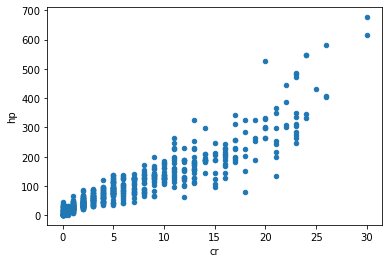

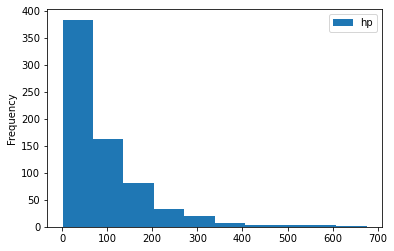

In [95]:
# dt = clean_monsters.groupby("hp").count()
# dt.plot.pie(y="cr")
# pie chart is way too messy...
clean_monsters.plot.scatter(x="cr", y="hp")
clean_monsters.plot.hist(x="cr", y="hp")

In [96]:
# check = clean_monsters.loc[clean_monsters["hp"] > 500 ]
# print(check)

# looking for the outliers, specifically that dot ~500 hp and ~20 cr - it fits with the creature

<AxesSubplot:ylabel='Frequency'>

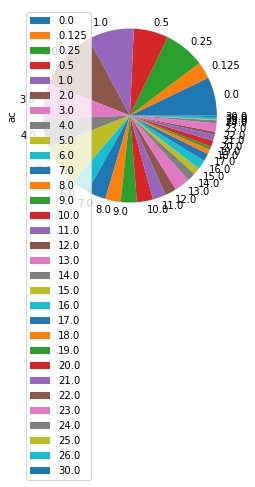

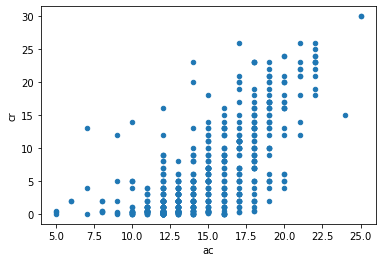

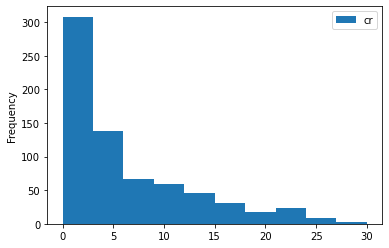

In [97]:
dt = clean_monsters.groupby("cr").count()
dt.plot.pie(y="ac")
clean_monsters.plot.scatter(x="ac", y="cr")
clean_monsters.plot.hist(x="ac", y="cr")

### Movement

- **speed**: How far a monster can move on its turn. This includes flying, swimming, climbing, and burrowing
    - Typical Ranges: 0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 120 feet
- **swim**: Swimming speed - how fast a creature can swim and doesn't spend extra movement to swim
    - Typical Ranges: 0, 10, 20, 25, 30, 40, 50, 60, 80, 100, 120 feet
- **fly**: Flying speed - how far a creature can fly (some creatures have ability to hover)
    - Typical Ranges: 0, 10, 20, 25, 30, 40, 50, 60, 80, 90, 120, 150 feet
- **climb**: Climbing speed - How high a monster can climb
    - Typical Ranges: 0, 5, 10, 20, 25, 30, 40 feet
- **burrow**: Burrowing speed - How fast a creature can burrow through various terrains
    - Typical Ranges: 0, 5, 10, 15, 20, 30, 40, 50 feet
    - Terrain examples: ice, mud, sand, earth, rock only if special trait    

<AxesSubplot:ylabel='Frequency'>

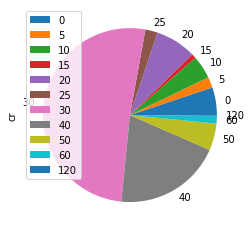

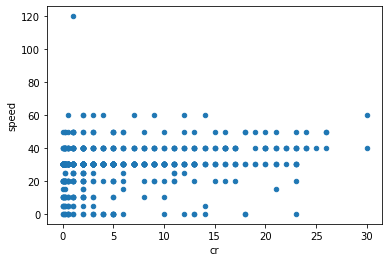

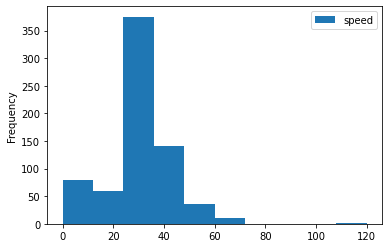

In [98]:
dt = clean_monsters.groupby("speed").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="speed")
clean_monsters.plot.hist(x="cr", y="speed")

In [99]:
# speed_check=clean_monsters.loc[clean_monsters["speed"] >100]
# print(speed_check)
# speed_check=clean_monsters.loc[clean_monsters["cr"] >25]
# print(speed_check)

#checking the outliers - they make sense thematically

<AxesSubplot:ylabel='Frequency'>

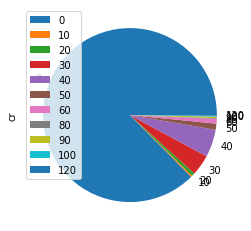

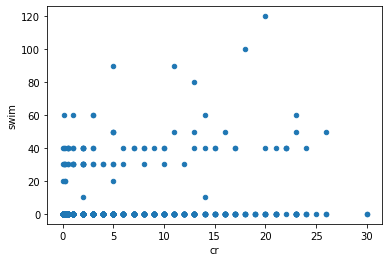

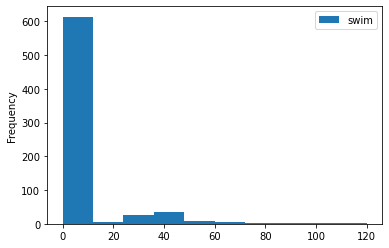

In [100]:
dt = clean_monsters.groupby("swim").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="swim")
clean_monsters.plot.hist(x="cr", y="swim")

In [101]:
# swim_check=clean_monsters.loc[clean_monsters["swim"] > 80]
# print(swim_check)

<AxesSubplot:ylabel='Frequency'>

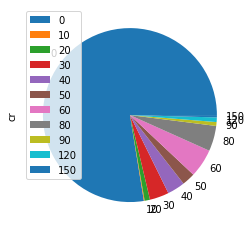

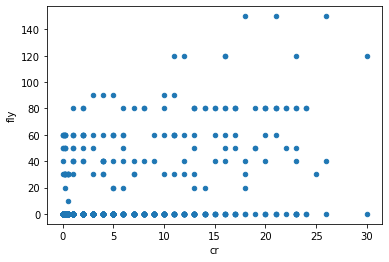

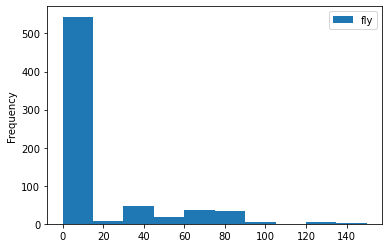

In [102]:
dt = clean_monsters.groupby("fly").count()
dt.plot.pie(y="cr")

clean_monsters.plot.scatter(x="cr", y="fly")
clean_monsters.plot.hist(x="cr", y="fly")

<AxesSubplot:ylabel='Frequency'>

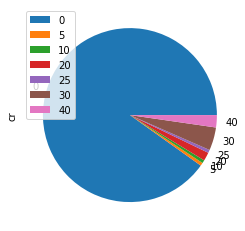

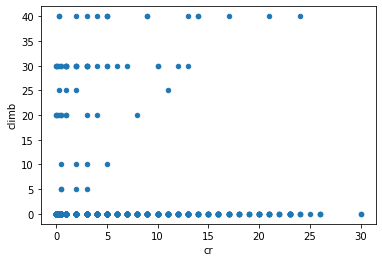

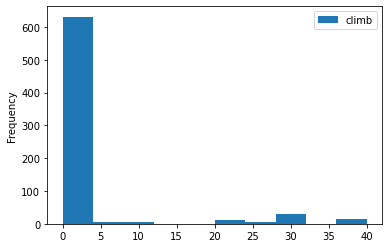

In [103]:
dt = clean_monsters.groupby("climb").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="climb")
clean_monsters.plot.hist(x="cr", y="climb")

<AxesSubplot:ylabel='Frequency'>

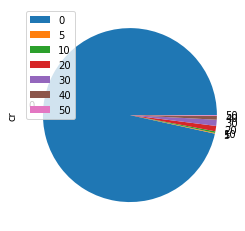

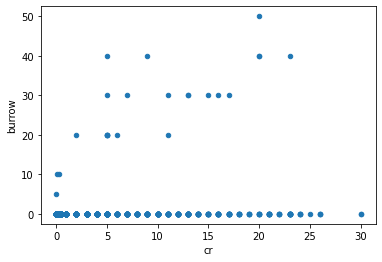

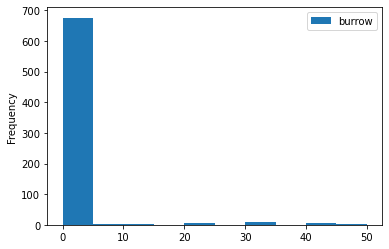

In [104]:
dt = clean_monsters.groupby("burrow").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="burrow")
clean_monsters.plot.hist(x="cr", y="burrow")

### Senses

- **passive_perception**: the threshold for a creature's observation skills
    - Ranged from 0-36
- **darkvision**: How well a creature can see in the dark
    - Typical ranges: 0, 30, 60, 90, 120, and 240 feet
- **truesight**: How well a creature can see in normal and magical darkness, see invisibile creatures/objects, and detect illusions
    - Typical ranges: 0, 30, 60, 120 feet
- **tremorsense**: Ability to detect the origin of vibrations within a speific range
    - Typical ranges: 0, 30, 60, 120 feet
- **blindsight**: Ability to see without eyes within a range
    - Typical ranges: 0, 10, 30, 60, 120, 500 feet

<AxesSubplot:ylabel='Frequency'>

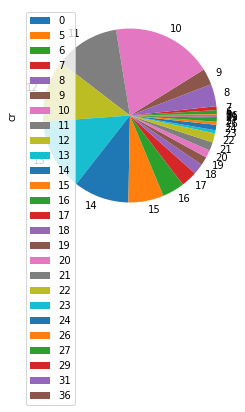

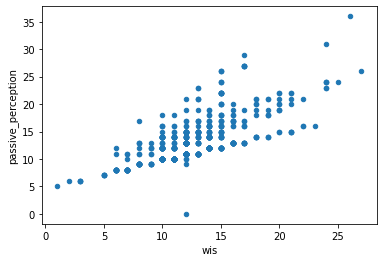

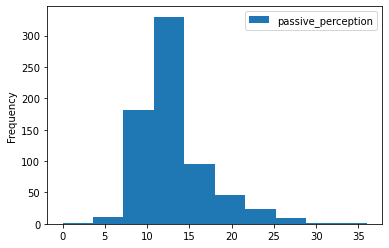

In [105]:
dt = clean_monsters.groupby("passive_perception").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="wis", y="passive_perception")
clean_monsters.plot.hist(x="cr", y="passive_perception")

In [106]:
# check = clean_monsters.loc[clean_monsters["passive_perception"] > 30 ]
# print(check)
# passive-perception is based on wisdom, so the creatures with high wisdom have high pass_percep

<AxesSubplot:ylabel='Frequency'>

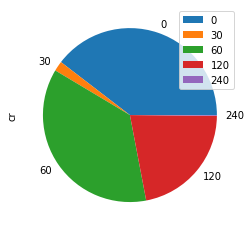

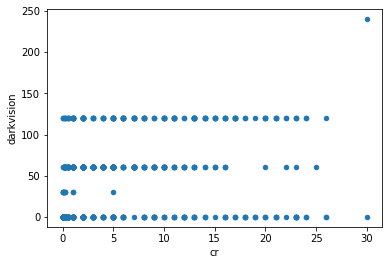

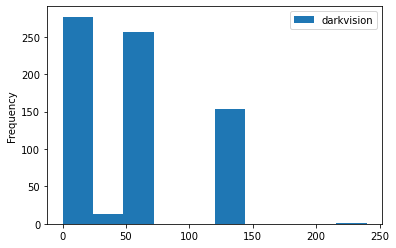

In [107]:
dt = clean_monsters.groupby("darkvision").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="darkvision")
clean_monsters.plot.hist(x="cr", y="darkvision")

In [108]:
# check = clean_monsters.loc[clean_monsters["darkvision"] > 200 ]
# print(check)
# tiamat is a 5 headed and 5 colored dragon, each head is awesome in the perks of the chromatics
# Many of the "bad guys" live in the ground/caves/underwater where darkvision would be needed to survive/thrive
# for the setting, this works

<AxesSubplot:ylabel='Frequency'>

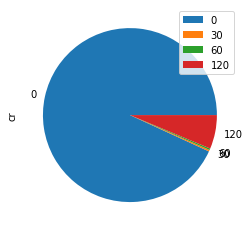

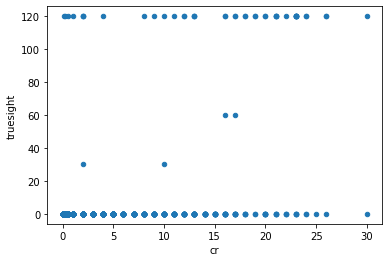

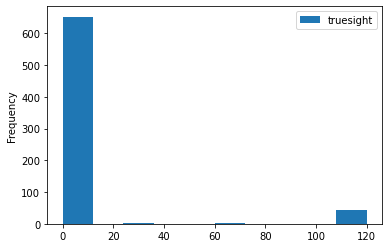

In [109]:
dt = clean_monsters.groupby("truesight").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="truesight")
clean_monsters.plot.hist(x="cr", y="truesight")

In [110]:
# check = clean_monsters.loc[clean_monsters["truesight"] > 100 ]
# print(check)
# paired with telepathy - which all of these creatures (with avaialable abilities) have in common 
# (top right is our friend tiamat again)

<AxesSubplot:ylabel='Frequency'>

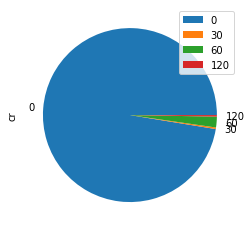

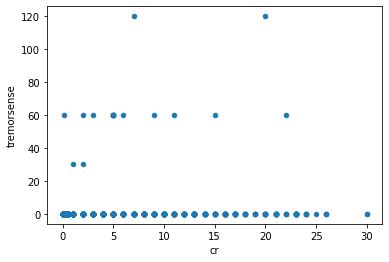

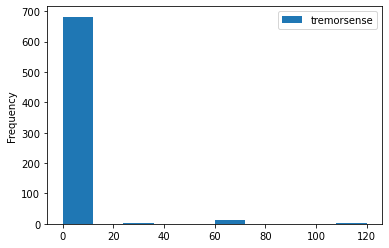

In [111]:
dt = clean_monsters.groupby("tremorsense").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="tremorsense")
clean_monsters.plot.hist(x="cr", y="tremorsense")

In [112]:
# check = clean_monsters.loc[clean_monsters["tremorsense"] > 100 ]
# print(check)
# korreds are creatures of the earth, ogremoch referred to as walking mountains. 
#the hight tremorsense makes sense for these creatures

# check = clean_monsters.loc[clean_monsters["tremorsense"] > 50 ]
# print(check)
# These are earth/mountain creatures

<AxesSubplot:ylabel='Frequency'>

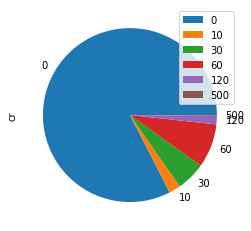

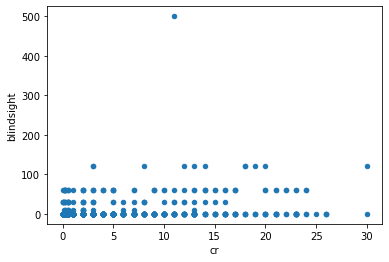

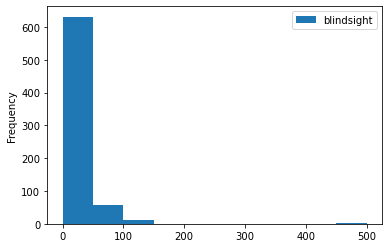

In [113]:
dt = clean_monsters.groupby("blindsight").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cr", y="blindsight")
clean_monsters.plot.hist(x="cr", y="blindsight")

In [114]:
# check = clean_monsters.loc[clean_monsters["blindsight"] > 400 ]
# print(check)
# This is legit for the type of creature 

### Ability Scores, Modifier Scores, & Saving Throws</h3> 

- **Ability Scores:**  numerical representation of a creature's physical/mental abilities
- **Modifier Scores:** applied to abilities to show depth of mastery or magitude of that ability.  Also applied to related skills.
- **Saving Throws:**  represent a numeric value to avoid a threat/attack based on corresponding ability.
 
        
        
- **strength**: How strong a creature is.
    - Range: 1-30
- **str_mod**: The magnitude of strength a creature has.    
    - Examples: athletics, wrestling, cracking walnuts with one hand
    - Range: -5 - 9
- **str_save**:
    - Range: 0-19

        
        
- **dex**: How agile a creature is
    - Range: 1-28
- **dex_mod**: The magnitude of agility a creature has.  
    - Examples: stealth, slight of hand, acrobatics
    - Range: -5 - 9
- **dex_save**
    - Range: 0-14

        
    
- **con**: How much endurance a creature has
    - Range: 3, 8-30
- **con_mod**: The magnitude of endurance a creature has.  
    - Examples: amount of concentration for a spell, tolerances to bad food or poison    
- **con_save**
    - Range: 0-16

        
        
- **intel**: How intelligent a creature is
    - Range: 1-27
- **int_mod**: The magnitude of intelligent a creature has.
    - Examples: certain spells require high intelligence, investigation skills, history factoids
    - Range: -5 - 8        
- **int_save**
    - Range:0-16        

        
        
- **wis**: How wise a creature is 
    - Range: 1-27
- **wis_mod**: The magnitude of wisdom a creature has.  
    - Examples: certain spells use wisdom to cast, perception, nature skills
    - Range: -5 - 8        
- **wis_save**
    - Range: 0-17        

        
        
- **cha**: How charasmatic a creature is
    - Range: 1-30  
- **cha_mod**: The magnitude of charisma a creature has.  .
    - Examples: certain spells use charisma to cast, persuation, intimidation
    - Range: -5 - 9
- **cha_save**
    - Range: 1-18        

#### Strength

<AxesSubplot:ylabel='Frequency'>

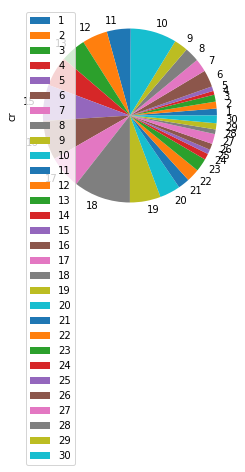

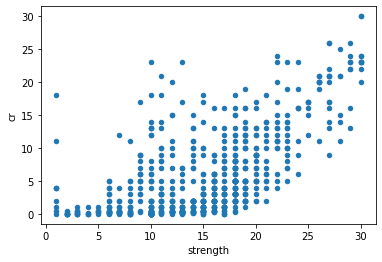

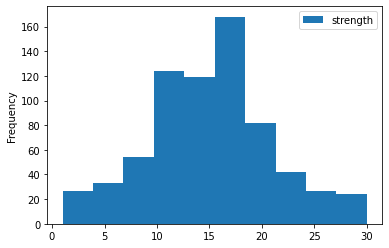

In [115]:
dt = clean_monsters.groupby("strength").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="strength", y="cr")
clean_monsters.plot.hist(x="cr", y="strength")

In [116]:
# check = clean_monsters.loc[clean_monsters["strength"] > 29 ]
# print(check)
# check = clean_monsters.loc[(clean_monsters["strength"] < 2) & (clean_monsters['cr'] > 10)  ]
# print(check)
# check = clean_monsters.loc[(clean_monsters["strength"].between(10,15)) & (clean_monsters['cr'] > 20)  ]
# print(check)

# these make sense for the themes of the game

<AxesSubplot:ylabel='Frequency'>

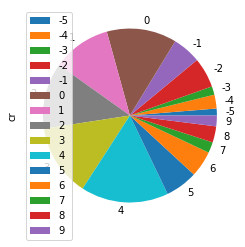

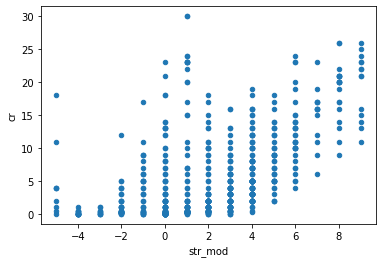

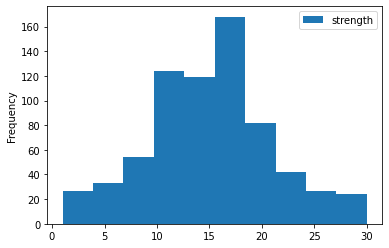

In [117]:
dt = clean_monsters.groupby("str_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="str_mod", y="cr")
clean_monsters.plot.hist(x="str_mod", y="strength")

In [118]:
# check = clean_monsters.loc[(clean_monsters["str_mod"].between(0,2)) & (clean_monsters['cr'] > 20)  ]
# print(check)

# check = clean_monsters.loc[(clean_monsters["str_mod"] < 0) & (clean_monsters['cr'] > 10)  ]
# print(check)

# these all work thematically

<AxesSubplot:ylabel='Frequency'>

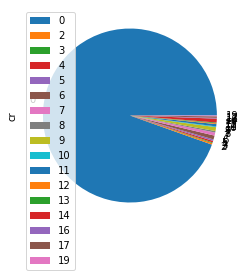

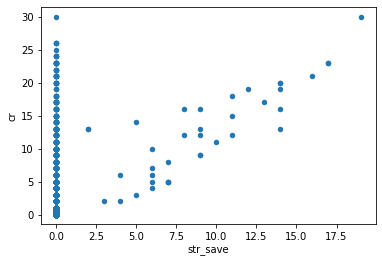

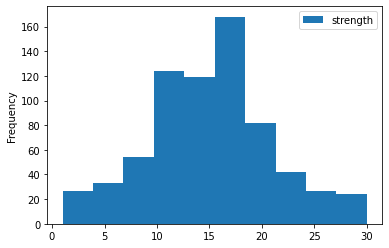

In [119]:
dt = clean_monsters.groupby("str_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="str_save", y="cr")
clean_monsters.plot.hist(x="str_save", y="strength")

In [120]:
# check = clean_monsters.loc[(clean_monsters['cr'] > 29) & (clean_monsters["str_save"] < 1) ]
# print(check)
# check = clean_monsters.loc[(clean_monsters['cr'] > 29) & (clean_monsters["str_save"] > 17) ]
# print(check)
# oh look, it's tiamat again!

#### Dexterity

<AxesSubplot:ylabel='Frequency'>

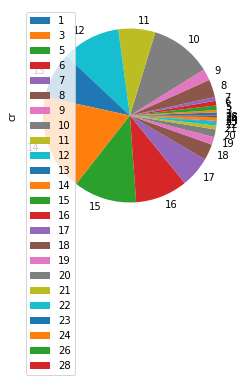

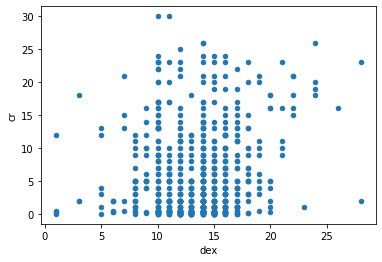

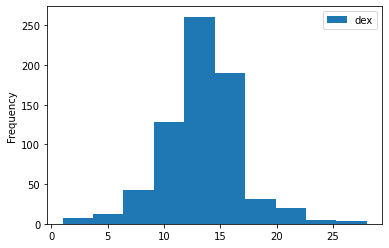

In [121]:
dt = clean_monsters.groupby("dex").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="dex", y="cr")
clean_monsters.plot.hist(x="cr", y="dex")

<AxesSubplot:ylabel='Frequency'>

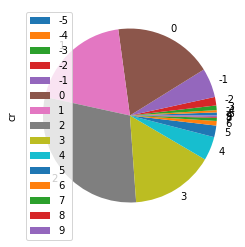

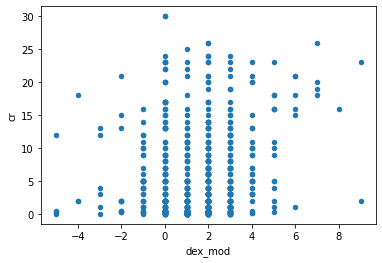

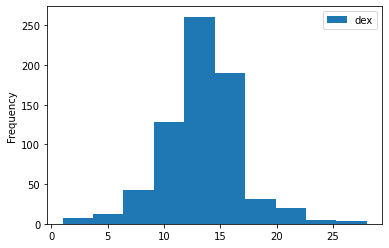

In [122]:
dt = clean_monsters.groupby("dex_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="dex_mod", y="cr")
clean_monsters.plot.hist(x="dex_mod", y="dex")

<AxesSubplot:ylabel='Frequency'>

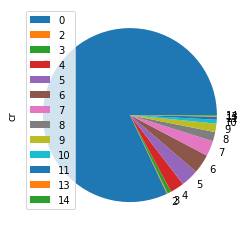

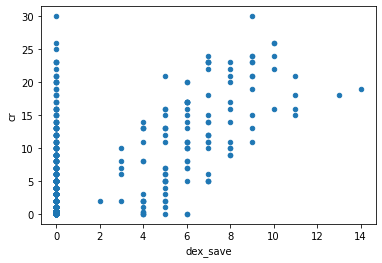

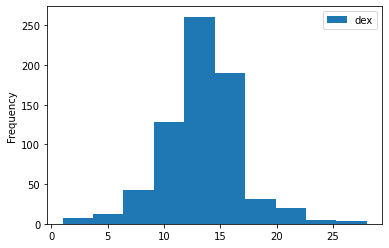

In [123]:
dt = clean_monsters.groupby("dex_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="dex_save", y="cr")
clean_monsters.plot.hist(x="dex_save", y="dex")

#### Constitution

<AxesSubplot:ylabel='Frequency'>

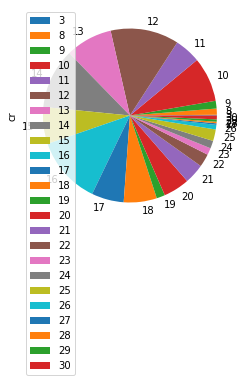

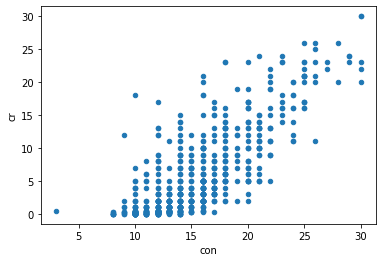

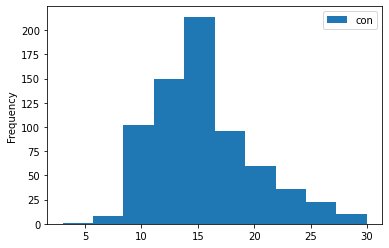

In [124]:
dt = clean_monsters.groupby("con").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="con", y="cr")
clean_monsters.plot.hist(x="cr", y="con")

<AxesSubplot:ylabel='Frequency'>

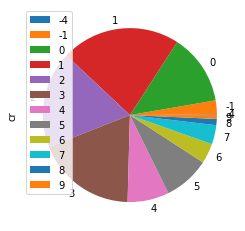

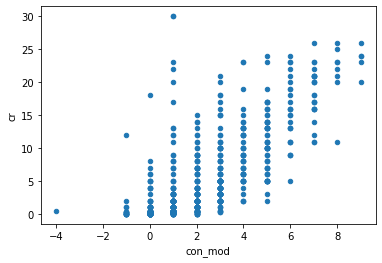

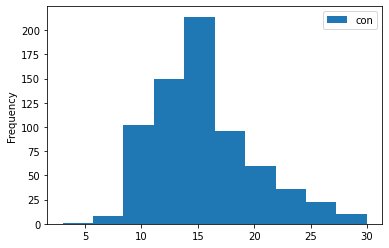

In [125]:
dt = clean_monsters.groupby("con_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="con_mod", y="cr")
clean_monsters.plot.hist(x="con_mod", y="con")

<AxesSubplot:ylabel='Frequency'>

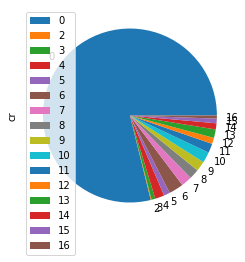

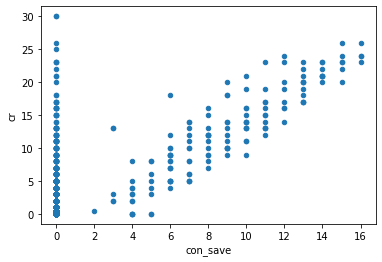

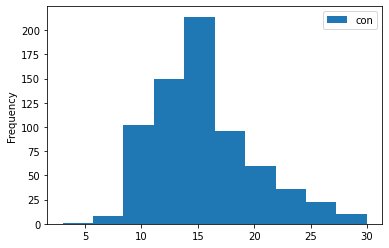

In [126]:
dt = clean_monsters.groupby("con_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="con_save", y="cr")
clean_monsters.plot.hist(x="con_save", y="con")

#### Intelligence

<AxesSubplot:ylabel='Frequency'>

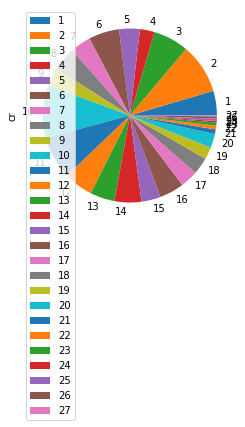

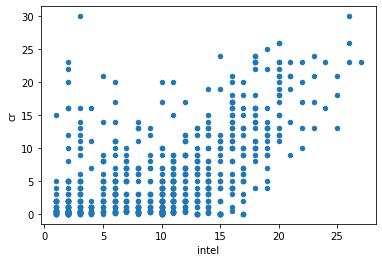

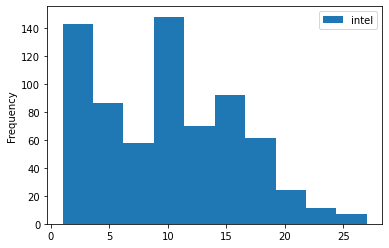

In [127]:
dt = clean_monsters.groupby("intel").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="intel", y="cr")
clean_monsters.plot.hist(x="cr", y="intel")

<AxesSubplot:ylabel='Frequency'>

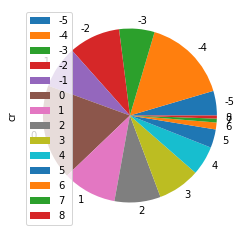

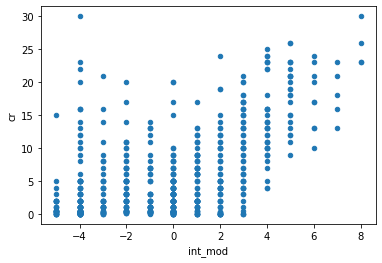

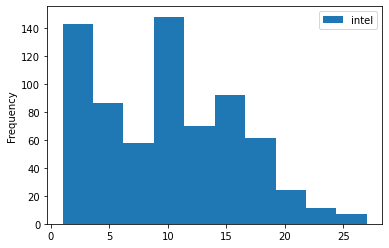

In [128]:
dt = clean_monsters.groupby("int_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="int_mod", y="cr")
clean_monsters.plot.hist(x="int_mod", y="intel")

<AxesSubplot:ylabel='Frequency'>

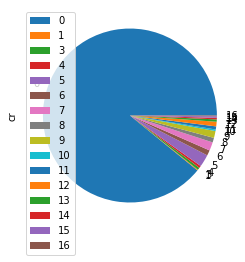

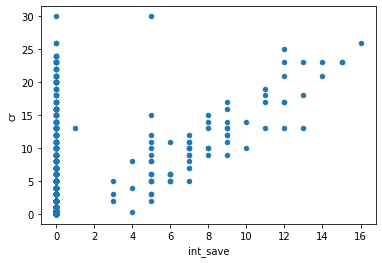

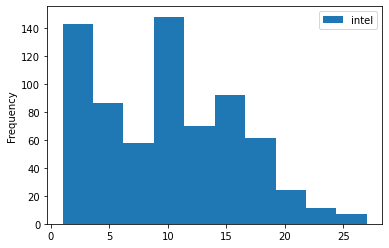

In [129]:
dt = clean_monsters.groupby("int_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="int_save", y="cr")
clean_monsters.plot.hist(x="int_save", y="intel")
# intelligence is a common mechanic for certain spell casters (Wizards, Rogues, Fighters)

#### Wisdom

<AxesSubplot:ylabel='Frequency'>

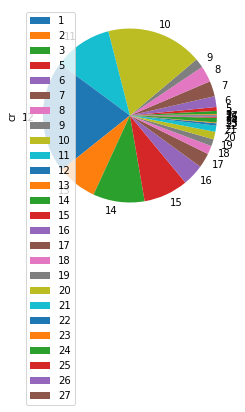

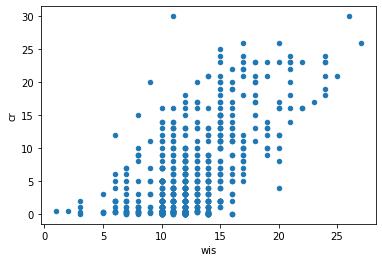

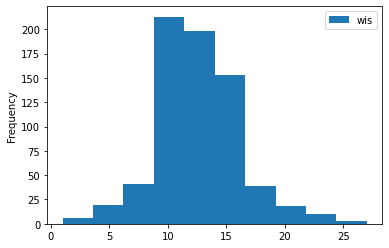

In [130]:
dt = clean_monsters.groupby("wis").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="wis", y="cr")
clean_monsters.plot.hist(x="cr", y="wis")

<AxesSubplot:ylabel='Frequency'>

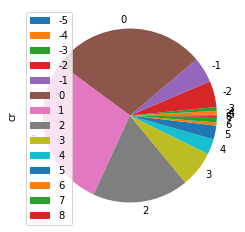

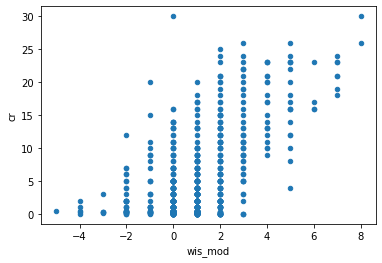

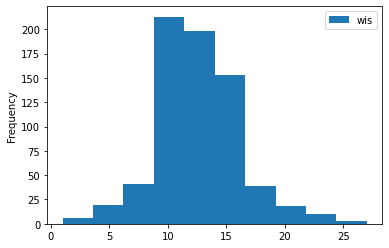

In [131]:
dt = clean_monsters.groupby("wis_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="wis_mod", y="cr")
clean_monsters.plot.hist(x="wis_mod", y="wis")

<AxesSubplot:ylabel='Frequency'>

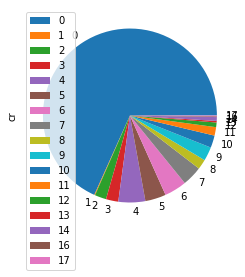

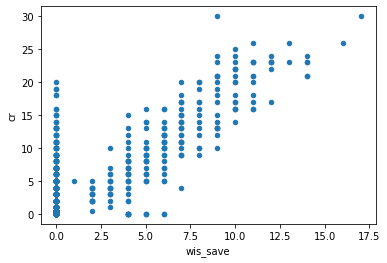

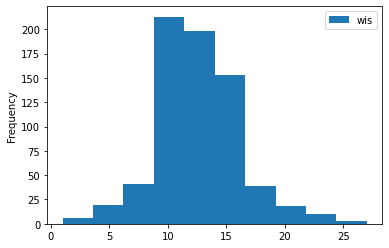

In [132]:
dt = clean_monsters.groupby("wis_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="wis_save", y="cr")
clean_monsters.plot.hist(x="wis_save", y="wis")

#### Charisma

<AxesSubplot:ylabel='Frequency'>

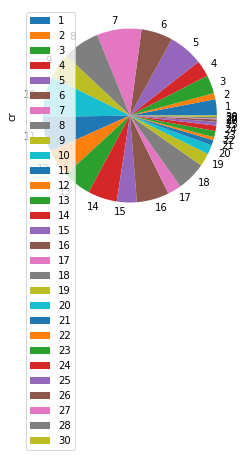

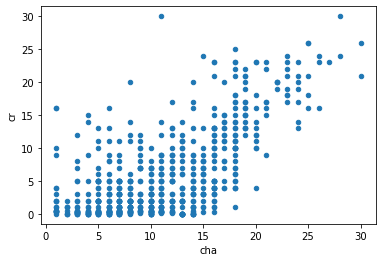

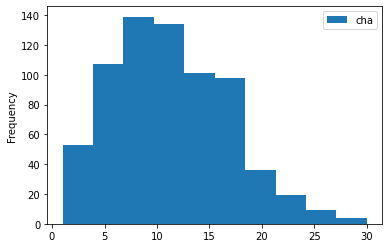

In [133]:
dt = clean_monsters.groupby("cha").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cha", y="cr")
clean_monsters.plot.hist(x="cr", y="cha")

<AxesSubplot:ylabel='Frequency'>

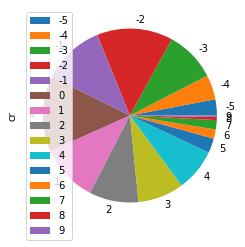

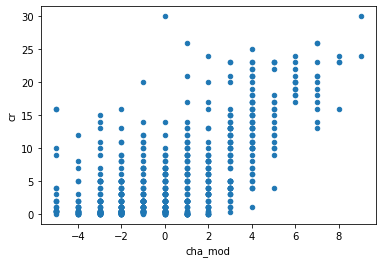

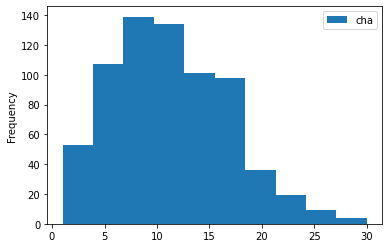

In [134]:
dt = clean_monsters.groupby("cha_mod").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cha_mod", y="cr")
clean_monsters.plot.hist(x="cha_mod", y="cha")

<AxesSubplot:ylabel='Frequency'>

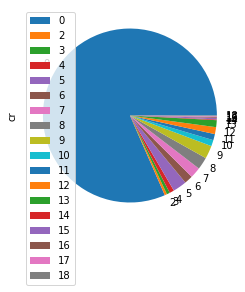

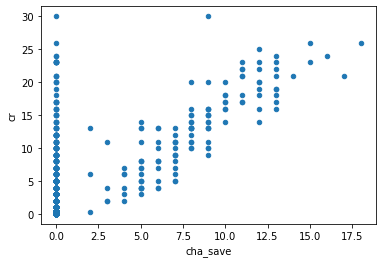

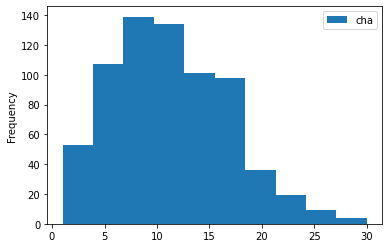

In [135]:
dt = clean_monsters.groupby("cha_save").count()
dt.plot.pie(y="cr")
clean_monsters.plot.scatter(x="cha_save", y="cr")
clean_monsters.plot.hist(x="cha_save", y="cha")

### Skills: things creature can be proficient in related to an ability. 

- **history**: (intel) ability to recall historical events, legends/myths, local and global disputes/wars
    - Range: 0-22
- **perception**: (wis) ability of your observation skills
    - Range: 0-26
- **stealth**: (dex) ability to hide, stay hidden, skulk and lurk without being notice
    - Range: 0-16
- **persuasion**: (cha) ability to be charming 
    - Range: 0-16
- **insight**: (wis) abiltiy to be a lie detctor, predict a next move by reading a situation or communication/body language skills
    - Range: 0-14
- **deception** (cha) ability to lie
    - Range: 0-15
- **arcana**: (int) ability to recall spells, magic trivia and usage in this plane and others
    - Range: 0-22
- **religion**: (intel) ability to recall prayers or rituals, symbols, cults, heirarchies, and other religious trivia
    - Range: 0-17
- **acrobatics**: (dex) ability to keep your feet in a situation
    - Range: 0-11
- **athletics**: (str) ability used for climbing, jumping, lifting, swimming
    - Range: 0-14
- **intimidation**: (cha) ability to be scary
    - Range: 0-18

#### History

<AxesSubplot:ylabel='Frequency'>

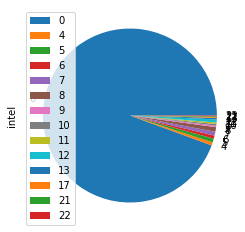

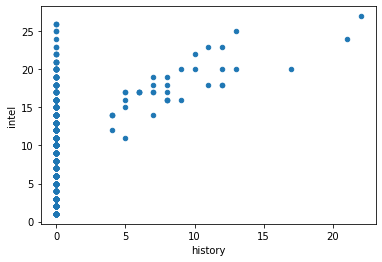

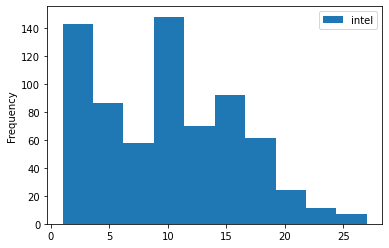

In [136]:
dt = clean_monsters.groupby("history").count()
dt.plot.pie(y="intel")
clean_monsters.plot.scatter(x="history", y="intel")
clean_monsters.plot.hist(x="history", y="intel")

#### Perception

<AxesSubplot:ylabel='Frequency'>

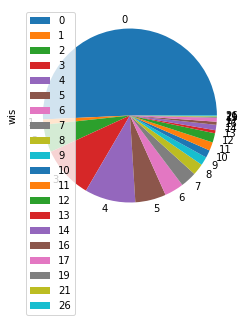

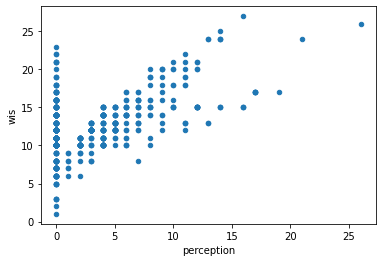

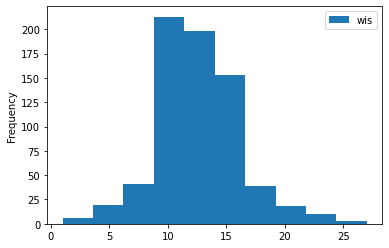

In [137]:
dt = clean_monsters.groupby("perception").count()
dt.plot.pie(y="wis")
clean_monsters.plot.scatter(x="perception", y="wis")
clean_monsters.plot.hist(x="perception", y="wis")

#### Stealth

<AxesSubplot:ylabel='Frequency'>

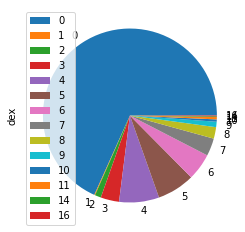

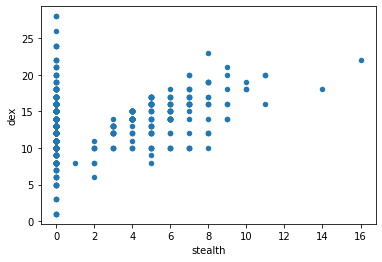

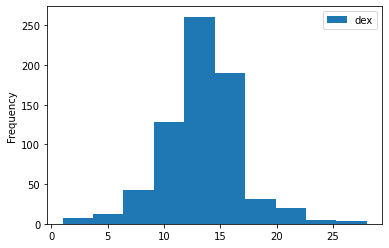

In [138]:
dt = clean_monsters.groupby("stealth").count()
dt.plot.pie(y="dex")
clean_monsters.plot.scatter(x="stealth", y="dex")
clean_monsters.plot.hist(x="stealth", y="dex")

#### Persuasion

<AxesSubplot:ylabel='Frequency'>

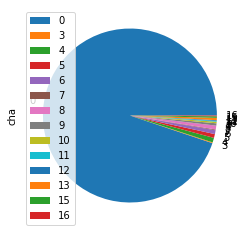

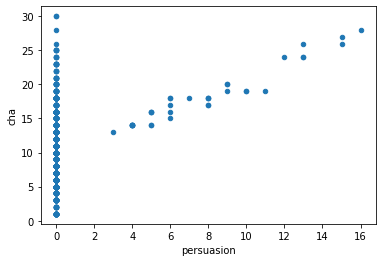

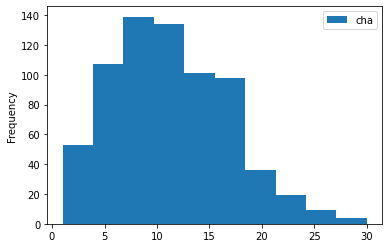

In [139]:
dt = clean_monsters.groupby("persuasion").count()
dt.plot.pie(y="cha")
clean_monsters.plot.scatter(x="persuasion", y="cha")
clean_monsters.plot.hist(x="persuasion", y="cha")

#### Insight

<AxesSubplot:ylabel='Frequency'>

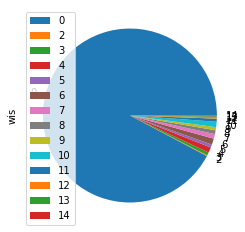

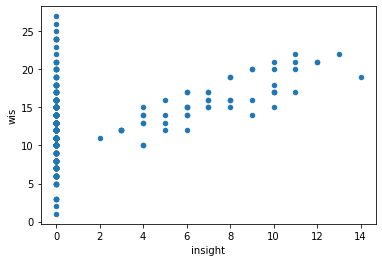

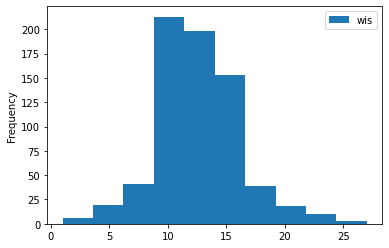

In [140]:
dt = clean_monsters.groupby("insight").count()
dt.plot.pie(y="wis")
clean_monsters.plot.scatter(x="insight", y="wis")
clean_monsters.plot.hist(x="insight", y="wis")

#### Deception

<AxesSubplot:ylabel='Frequency'>

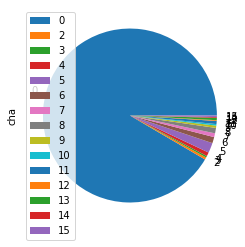

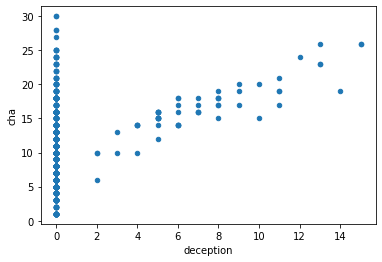

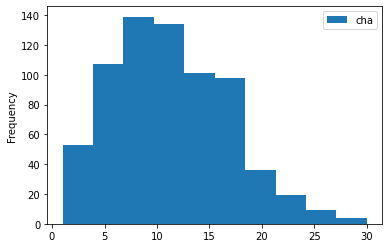

In [141]:
dt = clean_monsters.groupby("deception").count()
dt.plot.pie(y="cha")
clean_monsters.plot.scatter(x="deception", y="cha")
clean_monsters.plot.hist(x="deception", y="cha")

#### Arcana

<AxesSubplot:ylabel='Frequency'>

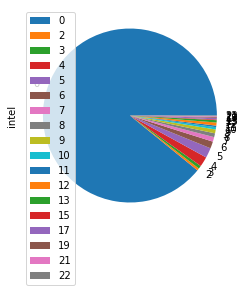

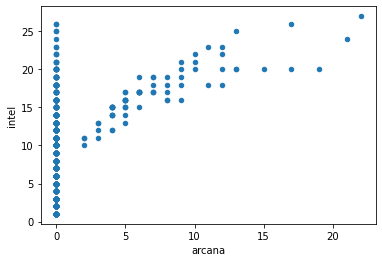

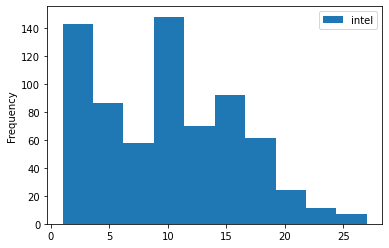

In [142]:
dt = clean_monsters.groupby("arcana").count()
dt.plot.pie(y="intel")
clean_monsters.plot.scatter(x="arcana", y="intel")
clean_monsters.plot.hist(x="arcana", y="intel")

#### Religion

<AxesSubplot:ylabel='Frequency'>

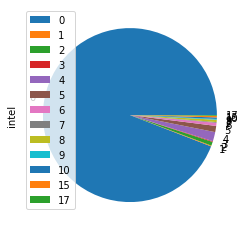

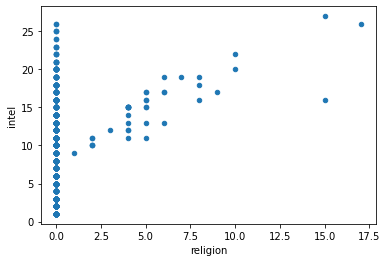

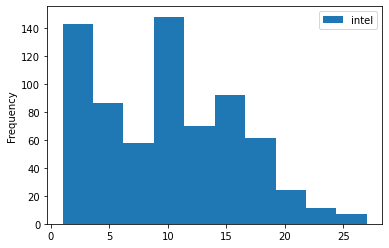

In [143]:
dt = clean_monsters.groupby("religion").count()
dt.plot.pie(y="intel")
clean_monsters.plot.scatter(x="religion", y="intel")
clean_monsters.plot.hist(x="religion", y="intel")

#### Acrobatics

<AxesSubplot:ylabel='Frequency'>

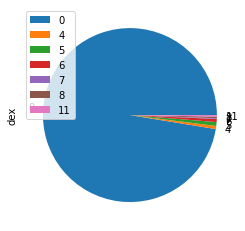

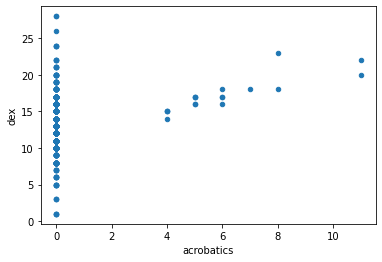

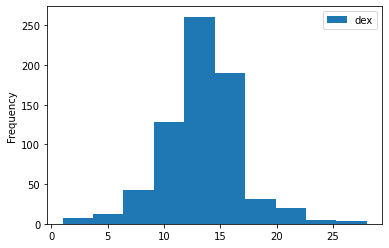

In [144]:
dt = clean_monsters.groupby("acrobatics").count()
dt.plot.pie(y="dex")
clean_monsters.plot.scatter(x="acrobatics", y="dex")
clean_monsters.plot.hist(x="acrobatics", y="dex")

#### Athletics

<AxesSubplot:ylabel='Frequency'>

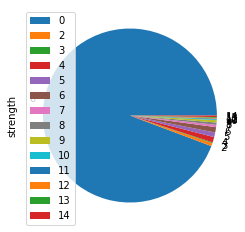

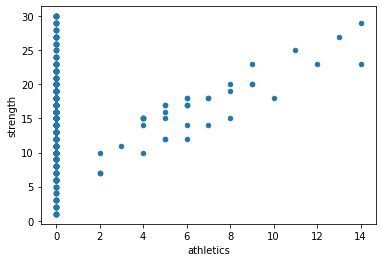

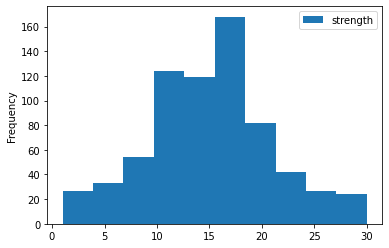

In [145]:
dt = clean_monsters.groupby("athletics").count()
dt.plot.pie(y="strength")
clean_monsters.plot.scatter(x="athletics", y="strength")
clean_monsters.plot.hist(x="athletics", y="strength")

#### Intimidation

<AxesSubplot:ylabel='Frequency'>

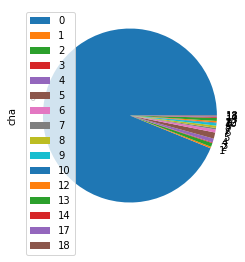

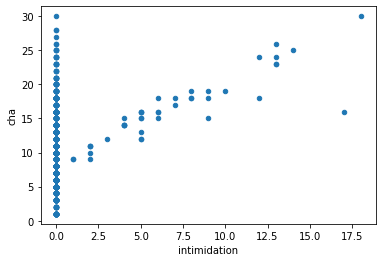

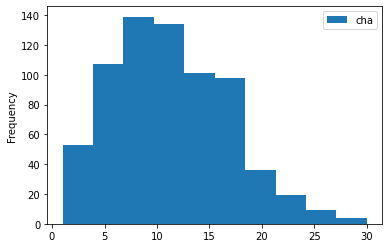

In [146]:
dt = clean_monsters.groupby("intimidation").count()
dt.plot.pie(y="cha")
clean_monsters.plot.scatter(x="intimidation", y="cha")
clean_monsters.plot.hist(x="intimidation", y="cha")

### Creature Features

- **senses**
    - List of each creature's senses with modifiers
- **attributes**
    - Notes about any creatrue's special abilities, typically based on race, class, or CR level
- **actions**
    - Notes about how the creature performs its actions, any proficiencies or weaknesses

In [147]:
clean_monsters[clean_monsters.isin(["unavailable"]).any(axis=1)]

,name,size,type,alignment,languages,ac,hp,cr,speed,swim,...,religion,acrobatics,athletics,intimidation,senses,attributes,actions,legendary_actions,legendary,source
1,abjurer,medium,humanoid (any race),any alignment,any four languages,12.0,84,9.0,30,0,...,0,0,0,0,passive Perception 11,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
3,abominable-yeti,huge,monstrosity,chaotic evil,Yeti,15.0,137,9.0,40,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 15",unavailable,unavailable,unavailable,0,Monster Manual
4,acererak,medium,undead,neutral evil,"Abyssal, Common, Draconic, Dwarvish, Elvish, G...",21.0,285,23.0,30,0,...,15,0,0,0,"truesight 120 ft., passive Perception 22",unavailable,unavailable,unavailable,0,Adventures (Tomb of Annihilation)
7,adult-blue-dracolich,huge,undead,lawful evil,"Common, Draconic",19.0,225,17.0,40,0,...,0,0,0,0,"blindsight 60 ft., darkvision 120 ft., passive...",unavailable,unavailable,unavailable,1,Monster Manual
14,adult-kruthik,medium,monstrosity,unaligned,Kruthik,18.0,39,2.0,40,0,...,0,0,0,0,"darkvision 60 ft., tremorsense 60 ft., passive...",unavailable,unavailable,unavailable,0,Mordenkainen's Tome of Foes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,yuan-ti-broodguard,medium,humanoid (yuan-ti),neutral evil,"Abyssal, Common, Draconic",14.0,45,2.0,30,0,...,0,0,0,0,"darkvision 60 ft., passive Perception 12",unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
754,yuan-ti-mind-whisperer,medium,"monstrosity (shapechanger, yuan-ti)",neutral evil,"Abyssal, Common, Draconic",14.0,71,4.0,30,0,...,0,0,0,0,darkvision 120 ft. (penetrates magical darknes...,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
756,yuan-ti-pit-master,medium,"monstrosity (shapechanger, yuan-ti)",neutral evil,"Abyssal, Common, Draconic",14.0,88,5.0,30,0,...,0,0,0,0,darkvision 120 ft. (penetrates magical darknes...,unavailable,unavailable,unavailable,0,Volo's Guide to Monsters
758,zaratan,gargantuan,elemental,neutral,none,21.0,307,22.0,40,40,...,0,0,0,0,"darkvision 60 ft., tremorsense 60 ft., passive...",unavailable,unavailable,unavailable,0,Mordenkainen's Tome of Foes


In [148]:
clean_monsters[clean_monsters["attributes"].str.contains("unavailable")].shape

(361, 53)

In [149]:
clean_monsters[clean_monsters["actions"].str.contains("unavailable")].shape

(361, 53)

### Legendary Stats

Only present in Legendary creatures

- **legendary_actions**
    - List of the actions taken by a legendary creature 
- **legendary**
    - status either true or false.

In [150]:
clean_monsters[clean_monsters["legendary_actions"].str.contains("unavailable")].shape

(361, 53)

In [151]:
clean_monsters[clean_monsters["legendary"]==0].shape

(657, 53)

In [152]:
clean_monsters[clean_monsters["legendary"]==1].shape

(43, 53)

In [153]:
# https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/
leg_act = clean_monsters[(clean_monsters["legendary"]==1) & (clean_monsters["legendary_actions"] == "unavailable")]
leg_act.shape
# leg_act.head(10)

(8, 53)

### Bibliography
    
- **source**
    - List of source material for each creature

In [154]:
clean_monsters["source"].isna().sum()

0

In [155]:
clean_monsters["source"].count()

700

In [156]:
clean_monsters.shape

(700, 53)

<h1 style="background-color:Tomato;text-align:center">Exporting Your Cleaned Data</h1>

**Basic Syntax:** cleaned-dataframe.to_csv("path-where-you-want-to-save-your-exported-file/name.csv")

[Importing and exporting CSV files in Python](https://medium.com/@kasiarachuta/importing-and-exporting-csv-files-in-python-7fa6e4d9f408)

In [157]:
more_monsters.to_csv("clean_monsters.csv")